# ETL - EDA | PI2 - Mauro_Ferrera

In [281]:
#### IMPORTAMOS LAS LIBRERIAS A UTILIZAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [282]:
#### IMPORTAMOS LOS DATOS
baf_1 = pd.read_csv("CSVS\Internet_BAF (2).csv")
baf_2 = pd.read_csv("CSVS\Internet_BAF (3).csv")
penetracion_1 = pd.read_csv("CSVS\Internet_Penetracion (2).csv")
penetracion_2 = pd.read_csv("CSVS\Internet_Penetracion (3).csv")
ingresos = pd.read_csv("CSVS\Internet_Ingresos.csv")
accesos_tecnologia = pd.read_csv("CSVS\Internet_Accesos-por-tecnologia.csv")
accesos_velocidad = pd.read_csv("CSVS\Internet_Accesos-por-velocidad (1).csv")
hist_velocidad = pd.read_csv("CSVS\historico_velocidad_internet (2).csv")
conectividad = pd.read_csv("CSVS\ConectividadalserviciodeInternet_2776151689180728669.csv")
localidades = pd.read_csv("CSVS\Listadodelocalidadesconconectividadainternet_2750221689180811605.csv")


## EDA - ETL - baf

In [283]:
print(baf_1.shape)
baf_1.head(5)

(35, 6)


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [284]:
print(baf_2.shape)
baf_2.head(5)

(840, 6)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


In [285]:
#### CONCATENAMOS ESTOS DATASETS
BAF = pd.concat([baf_1,baf_2], axis= 0)
BAF

# CONCLUSIONES: Hay 875 filas y 7 columnas  

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo,Provincia
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022,NaN
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022,NaN
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022,NaN
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021,NaN
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021,NaN
...,...,...,...,...,...,...,...
835,2014,1,26.304,460,26.764,NaN,Santa Cruz
836,2014,1,506.000,612,506.612,NaN,Santa Fe
837,2014,1,37.124,9,37.133,NaN,Santiago Del Estero
838,2014,1,27.272,766,28.038,NaN,Tierra Del Fuego


In [286]:
#### VEMOS LA CANTIDAD DE NULOS EN CADA COLUMNA
BAF.isnull().sum()

# CONCLUSIONES: La columna que contiene mayor cantidad de nulos es 'Periodo'

Año                   0
Trimestre             0
Banda ancha fija      0
Dial up               2
Total                 0
Periodo             840
Provincia            35
dtype: int64

In [287]:
#### VEMOS LOS TIPOS DE DATOS
BAF.info()

# CONCLUSIONES: La mayoria de las columna son tipo 'object' y debemos transformar algunas a tipo 'float'

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 839
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               875 non-null    int64 
 1   Trimestre         875 non-null    int64 
 2   Banda ancha fija  875 non-null    object
 3   Dial up           873 non-null    object
 4   Total             875 non-null    object
 5   Periodo           35 non-null     object
 6   Provincia         840 non-null    object
dtypes: int64(2), object(5)
memory usage: 54.7+ KB


In [288]:
#### TRANSFORMAMOS TIPOS DE DATOS
BAF['Banda ancha fija'] = BAF['Banda ancha fija'].str.replace('.', '').str.replace(',', '.').astype(float)
BAF['Total'] = BAF['Total'].str.replace('.', '').replace(',', '.').astype(float)
BAF['Dial up'] = BAF['Dial up'].str.replace('-', '').replace(',', '.').astype(float)




In [289]:
#### DESCRIPCION ESTADISTICA NUMERICA
BAF.describe()

# CONCLUSIONES: En promedio la banda ancha es de 661953.4 bps y el maximo es de 998.000000 bps

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,875.000000,875.000000,8.750000e+02,838.000000,8.750000e+02
mean,2017.885714,2.457143,6.619534e+05,150.010027,6.638240e+05
std,2.528685,1.104983,1.737895e+06,229.447186,1.742312e+06
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.000000,5.261900e+04,2.000000,5.262200e+04
50%,2018.000000,2.000000,1.076320e+05,15.614500,1.076330e+05
75%,2020.000000,3.000000,2.003070e+05,253.500000,2.010680e+05
max,2022.000000,4.000000,1.107869e+07,998.000000,1.109113e+07


In [290]:
####DESCRIPCION ESTADISTICA TIPO TEXTO
tipo_texto = BAF.select_dtypes(include=['object']).columns
df_texto = BAF[tipo_texto]
df_texto.describe()

# CONCLUSIONES: La provincia con mas frecuencia es Buenos Aires

,Periodo,Provincia
count,35,840
unique,35,24
top,Jul-Sept 2022,Buenos Aires
freq,1,35


In [291]:
df_numerico = BAF.select_dtypes(include=['number']) 
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (df_numerico < limite_inf) | (df_numerico > limite_sup)
valores_atipicos = df_numerico[mascaras]
valores_atipicos

,Año,Trimestre,Banda ancha fija,Dial up,Total
0,NaN,NaN,11078691.0,NaN,11091128.0
1,NaN,NaN,10946248.0,NaN,10958684.0
2,NaN,NaN,10611390.0,NaN,10624009.0
3,NaN,NaN,10476933.0,NaN,10489794.0
4,NaN,NaN,10075184.0,NaN,10085541.0
...,...,...,...,...,...
835,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,506000.0,NaN,506612.0
837,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,766.0,NaN


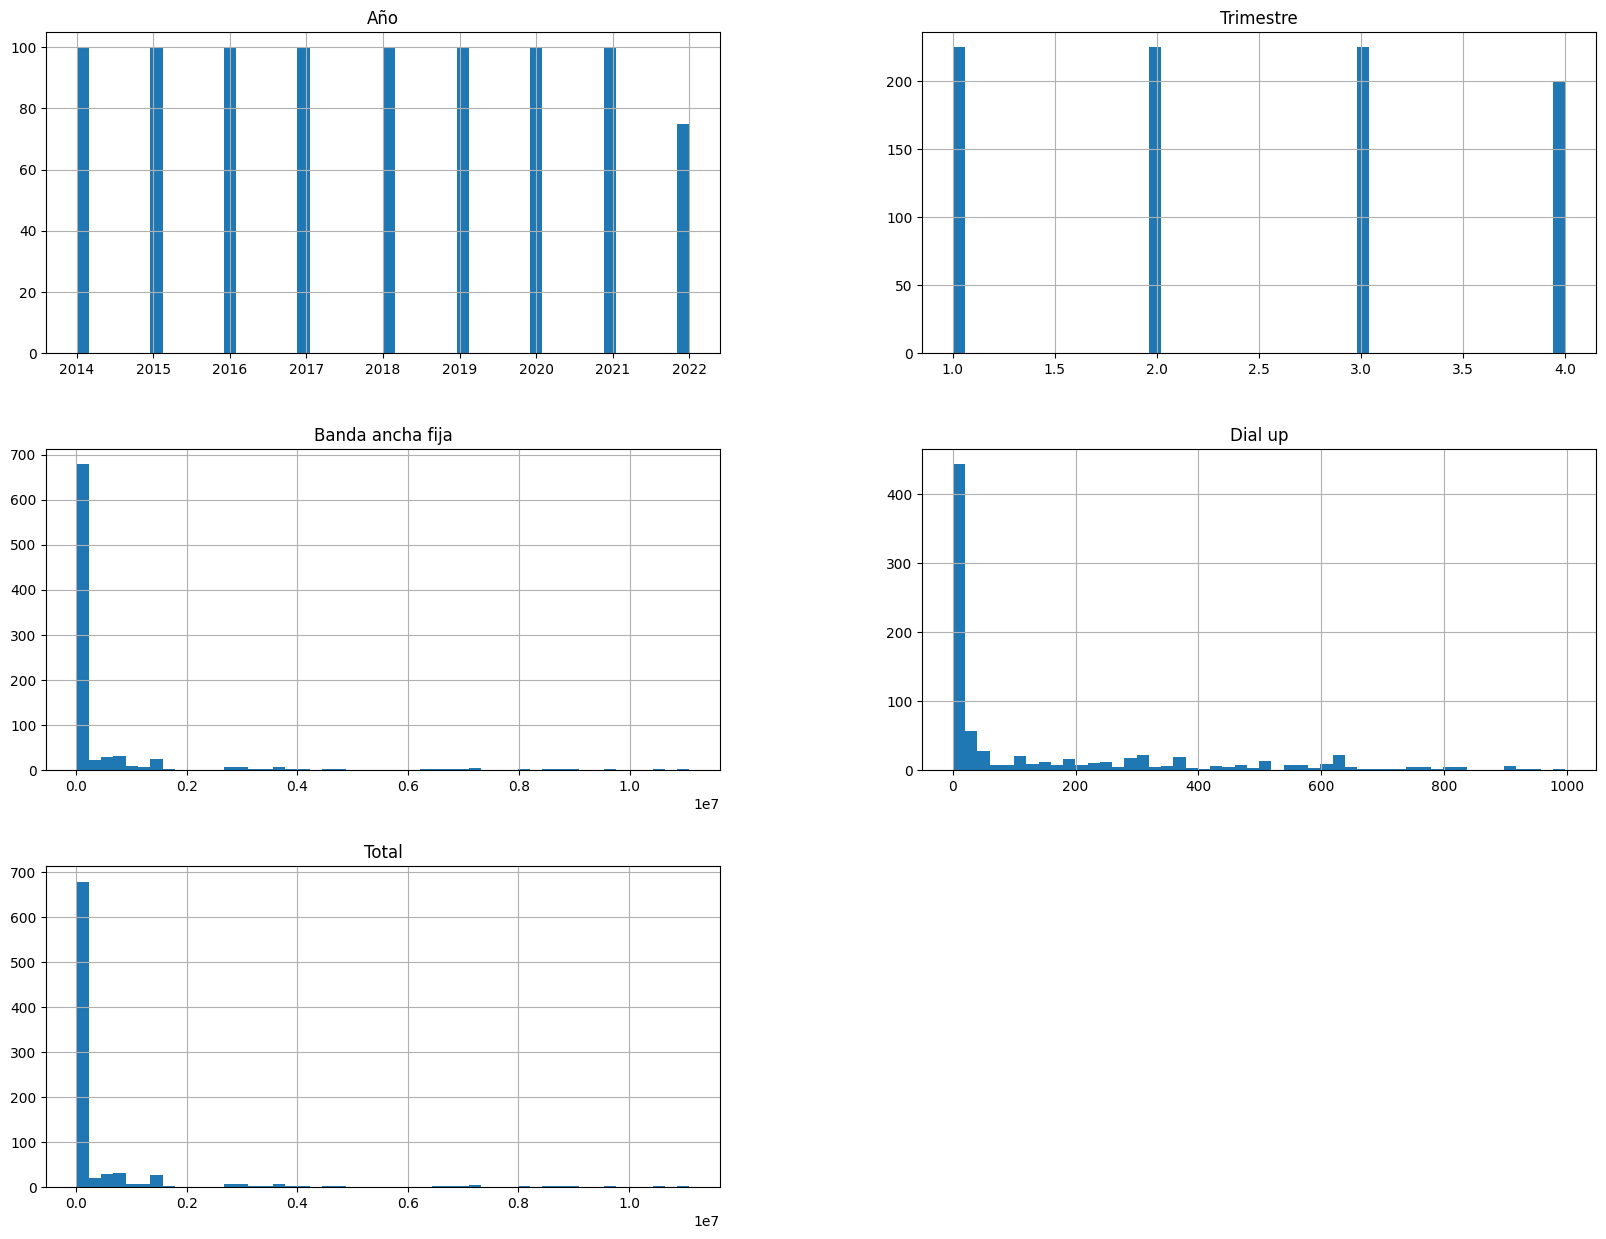

In [292]:
#### HACEMOS HISTOGRAMAS DE LOS DATOS
BAF.hist(bins = 50, figsize= (20,15))
plt.show()

#Esto es para conocer la distribucion de los datos

# CONCLUSIONES: Vemos que la mayoria de los datos estan sesgados hacia la izquierda habiendo asi valores mas altos en los extremos izquierdos 
#                siendo una asimetria negativa en la distribucion de los datos

## ETL - EDA - penetracion

In [293]:
print(penetracion_1.shape)
penetracion_1.head(5)

(840, 4)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [294]:
print(penetracion_2.shape)
penetracion_2.head(5)


(35, 5)


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [295]:
#### CONCATENAMOS LOS DATASETS 
penetracion = pd.concat([penetracion_1,penetracion_2], axis = 0)
penetracion

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,Buenos Aires,"78,11",NaN,NaN
1,2022,3,Capital Federal,"122,28",NaN,NaN
2,2022,3,Catamarca,"65,33",NaN,NaN
3,2022,3,Chaco,"43,86",NaN,NaN
4,2022,3,Chubut,"84,38",NaN,NaN
...,...,...,...,...,...,...
30,2015,1,NaN,"51,36","15,68",Ene-Mar 2015
31,2014,4,NaN,"50,5","15,39",Oct-Dic 2014
32,2014,3,NaN,"50,67","15,43",Jul-Sept 2014
33,2014,2,NaN,"49,86","15,16",Abr-Jun 2014


In [296]:
#### VEMOS CANTIDAD DE NULOS POR COLUMNA 
penetracion.isnull().sum()

Año                               0
Trimestre                         0
Provincia                        35
Accesos por cada 100 hogares      0
Accesos por cada 100 hab        840
Periodo                         840
dtype: int64

In [297]:
#### VEMOS LOS TIPOS DE DATOS
penetracion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           875 non-null    int64 
 1   Trimestre                     875 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  875 non-null    object
 4   Accesos por cada 100 hab      35 non-null     object
 5   Periodo                       35 non-null     object
dtypes: int64(2), object(4)
memory usage: 47.9+ KB


In [298]:
#### TRANFORMAMOS COLUMNAS A SUS TIPOS DE DATOS CORRECTOS
penetracion['Accesos por cada 100 hogares'] = penetracion['Accesos por cada 100 hogares'].str.replace('.', '').str.replace(',', '.').astype(float)
penetracion['Accesos por cada 100 hab'] = penetracion['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)

In [299]:
#### DESCIPCION ESTADISTICA NUMERICA
penetracion.describe()

# CONCLUSIONES: El trimestre promeedio es 2.45, el promedio de acceso a internet por cada 100 hogares es de 49.514137, acceso por cada 100 habitantes el promedio es 18.6062286 

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,875.000000,875.000000,875.000000,35.000000
mean,2017.885714,2.457143,49.514137,18.606286
std,2.528685,1.104983,22.846419,2.662968
min,2014.000000,1.000000,9.350000,15.050000
25%,2016.000000,1.000000,32.340000,16.245000
50%,2018.000000,2.000000,47.000000,18.240000
75%,2020.000000,3.000000,62.355000,20.475000
max,2022.000000,4.000000,124.060000,23.950000


In [300]:
####DESCRIPCION ESTADISTICA TIPO TEXTO
tipo_texto = penetracion.select_dtypes(include=['object']).columns
df_texto = penetracion[tipo_texto]
df_texto.describe()

# CONCLUSIONES: La provincia con mayor cantidad de accesos a internet es Buenos Aires 

,Provincia,Periodo
count,840,35
unique,24,35
top,Buenos Aires,Jul-Sept 2022
freq,35,1


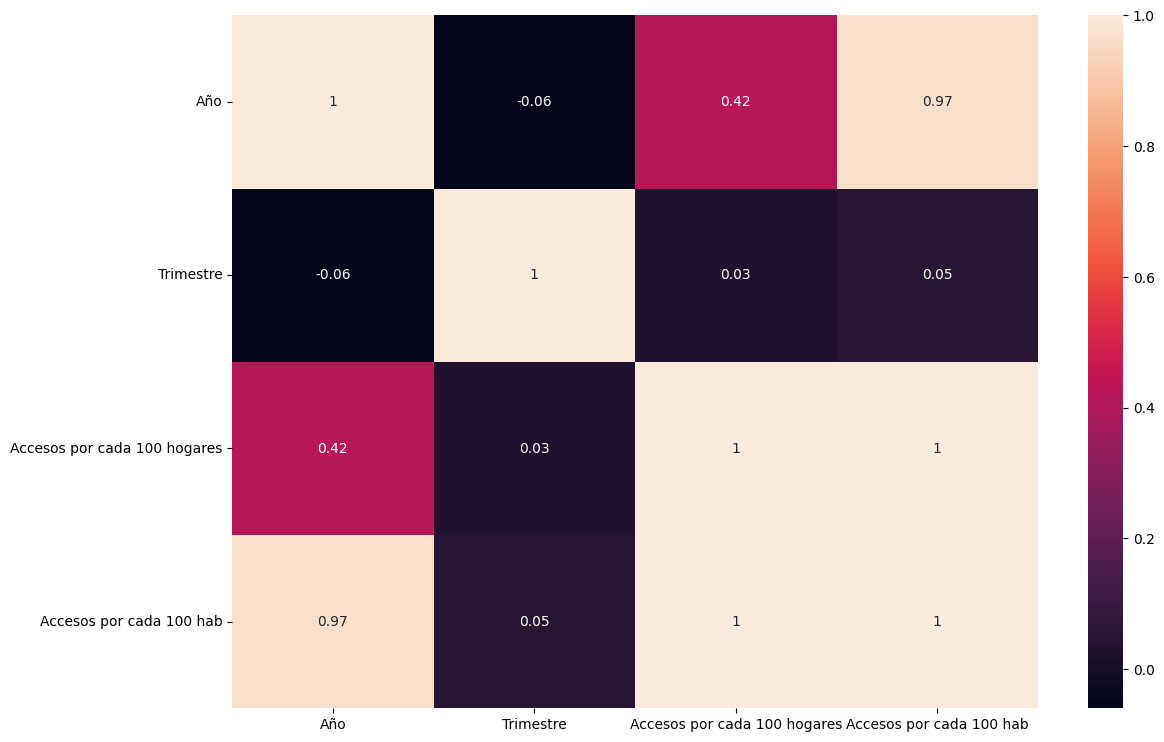

In [301]:
df_numerico = penetracion.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()

# CONCLUSIONES: Vemos que a medida que pasan los años mayor cantidad de accesos a internet por cada 100 habitantes hay, igualmente con cada 100 hogares

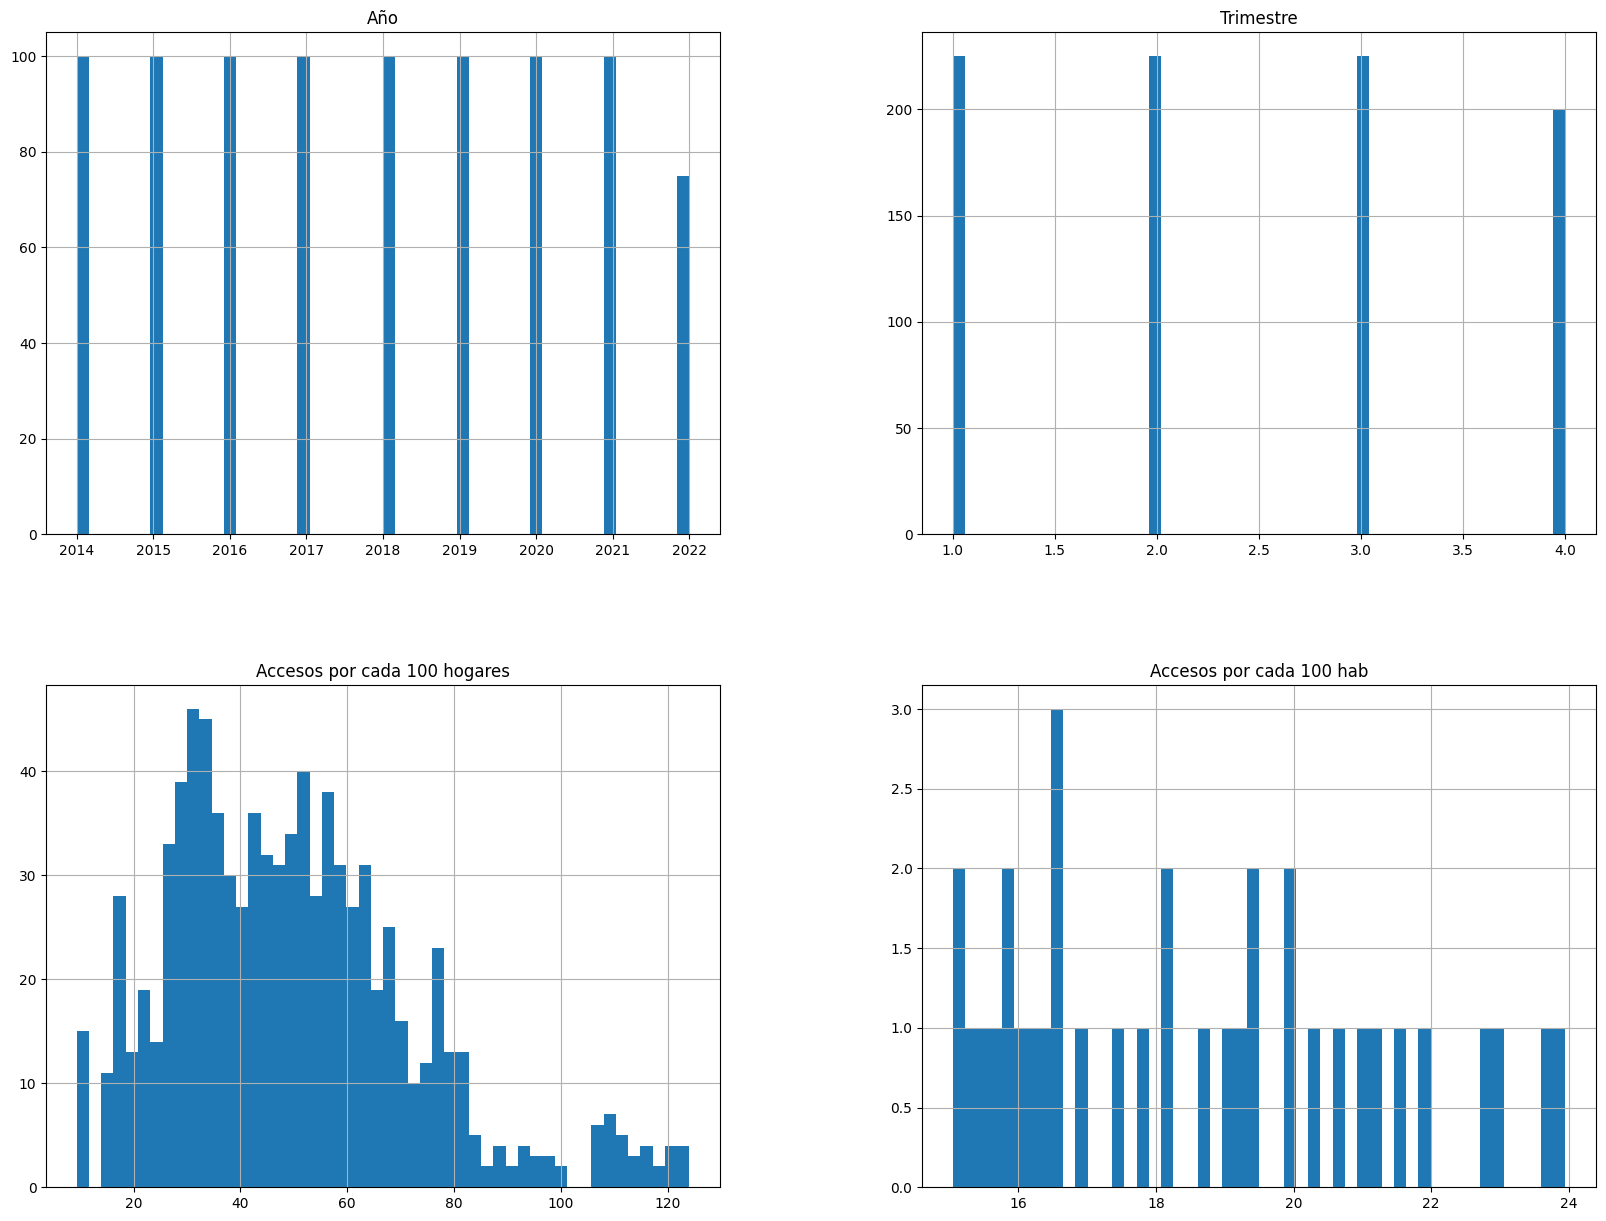

In [302]:
#### CREAMOS HISTOGRAMAS PARA CONOCER LA DISTRIBUCION DE LOS DATOS
penetracion.hist(bins = 50, figsize= (20,15))
plt.show()

# CONCLUSIONES: Vemos que los datos tienen una distribucion normal y uniforme lo que significa que hay datos que se agrupan al rededor de la media y otro que tienen la misma probabilidad de que ocurran que todos

## ETL - EDA - Ingresos

In [303]:
print(ingresos.shape)
ingresos.head(5)

#CONCLUSIONES: Hay 35 filas y 4 columnas 

(35, 4)


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [304]:
#### CANTIDAD DE NULOS 
ingresos.isnull().sum()

#CONCLUSIONES: No hya datos nulos  

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [305]:
#### TIPOS DE DATOS 
ingresos.info()

# CONCLUSIONES: Debemos cambiar el tipo de dato por el correcto a ingresos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [306]:
#### TRANSFORMAMOS TIPO DE DATOS
ingresos['Ingresos (miles de pesos)'] = ingresos['Ingresos (miles de pesos)'].str.replace('.', '').str.replace(',', '.').astype(float)

In [307]:
#### DESCRIPCION ESTADISTICA NUMERICA
ingresos.describe()

#CONCLUSIONES: El ingreso promedio es de 20,588,450 pesos, minimo 2,984,054 pesos y maximo 67,055,930 pesos

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


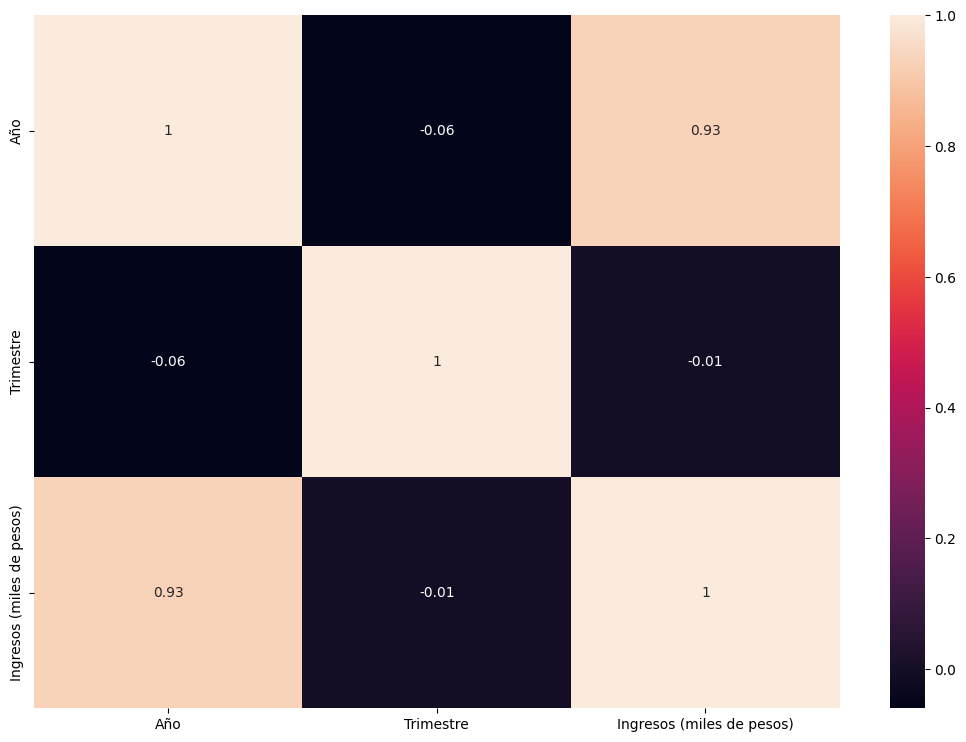

In [308]:
#### MAPA DE CALOR CON LAS CORRELACIONES
df_numerico = ingresos.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()

#CONCLUSIONES: Vemos que a medida que pasan los años mayores son los ingresos (en miles de pesos)


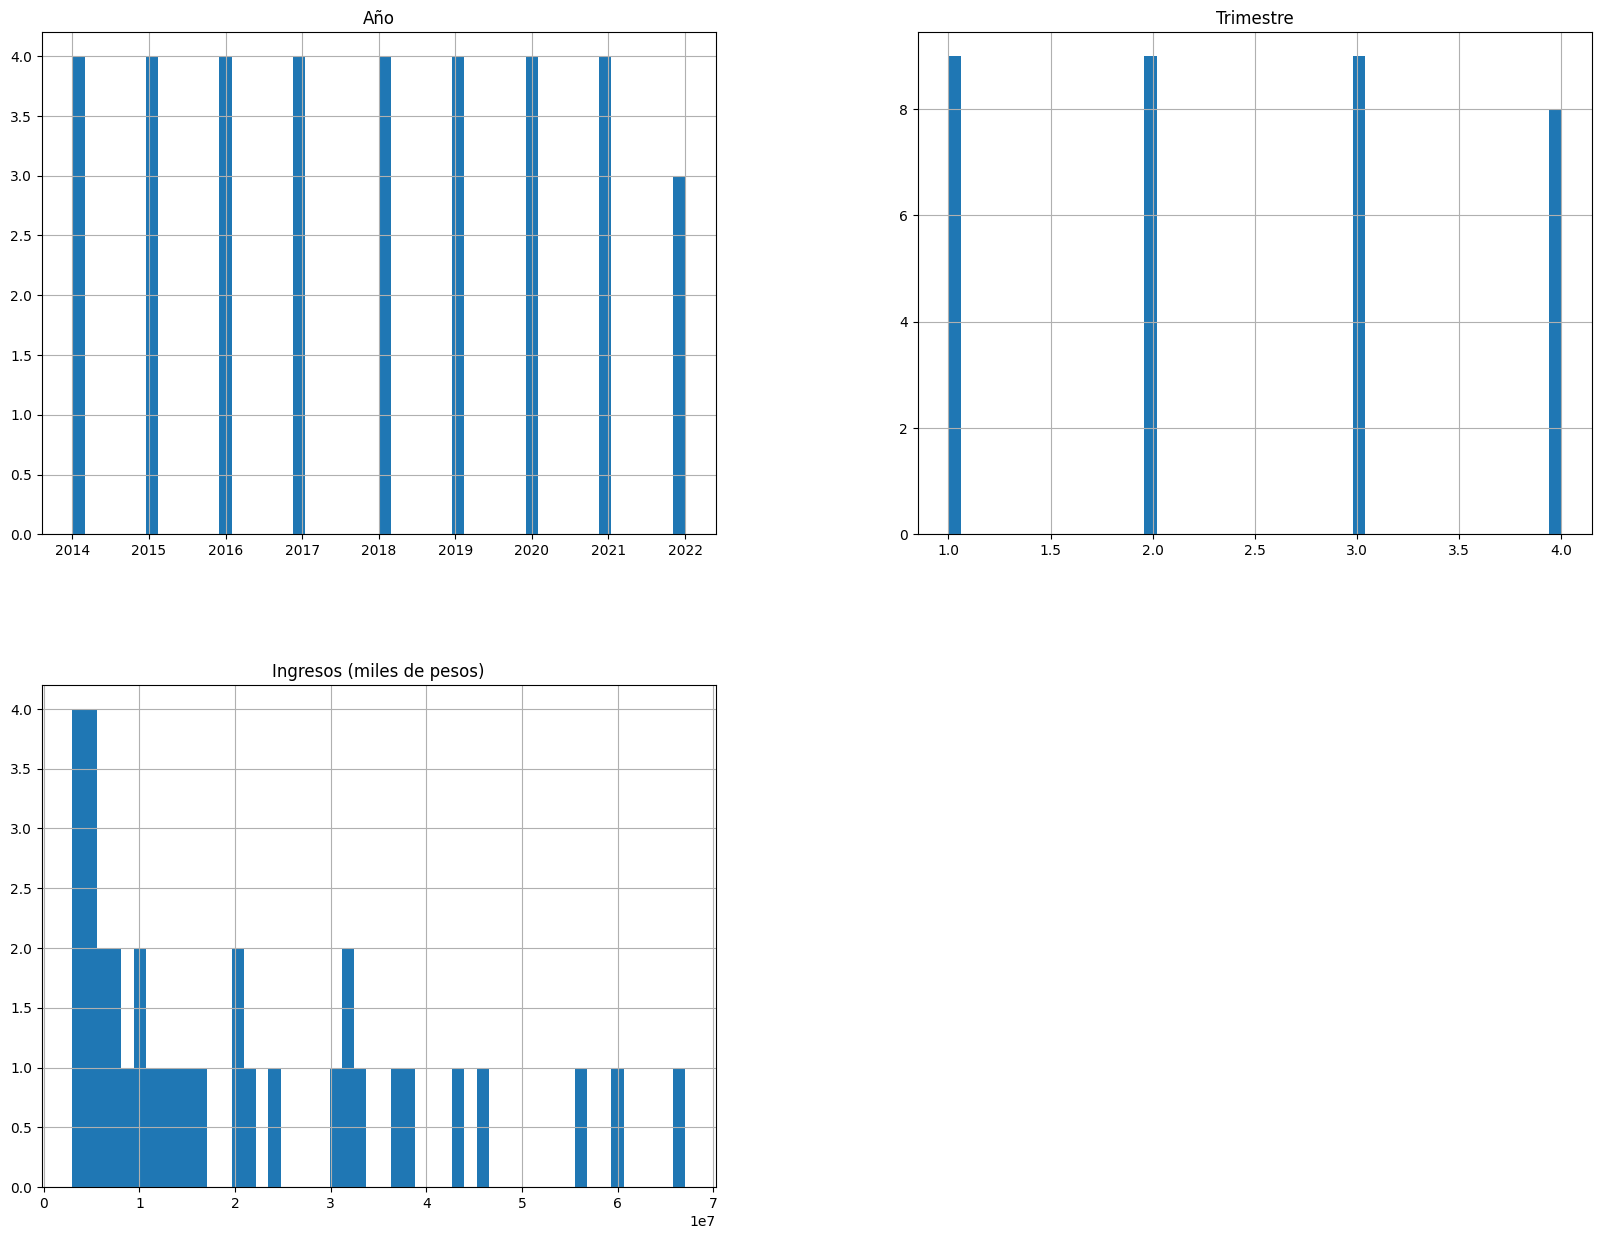

In [309]:
#### CREAMOS HISTOGRAMAS PARA CONOCER LA DISTRIBUCION DE LOS DATOS
ingresos.hist(bins = 50, figsize= (20,15))
plt.show()

#CONCLUSIONES: Vemos que los datos de 'ingresos (miles de pesos)' esta sesgado hacia la izquierda lo que significa que los valores estan agrupados en los valores mas bajos

## ETL - EDA - Accesos_velocidad

In [310]:
print(hist_velocidad.shape)
hist_velocidad.head(5)

(35, 4)


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [311]:
print(accesos_velocidad.shape)
accesos_velocidad.head(5)

(840, 12)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [312]:
#### CONCATENACION DE LOS DATASETS
acceso_por_velocidad = pd.concat([accesos_velocidad,hist_velocidad], axis= 0 )
acceso_por_velocidad

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Mbps (Media de bajada),Trimestre.1
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668,NaN,NaN
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679,NaN,NaN
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293,NaN,NaN
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146,NaN,NaN
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,35",Ene-Mar 2015
31,2014,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,16",Oct-Dic 2014
32,2014,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,87",Jul-Sept 2014
33,2014,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,76",Abr-Jun 2014


In [313]:
#### VEMOS VALORES NULOS
acceso_por_velocidad.isnull().sum()

# CONSLUSIONES: Mbps(media de bajada) y rimestre tienen muchos nulos, en Mbps podemos cambiar los nulos por el prommedio 

Año                         0
Trimestre                   0
Provincia                  35
HASTA 512 kbps             35
+ 512 Kbps - 1 Mbps        35
+ 1 Mbps - 6 Mbps          35
+ 6 Mbps - 10 Mbps         35
+ 10 Mbps - 20 Mbps        35
+ 20 Mbps - 30 Mbps        35
+ 30 Mbps                  35
OTROS                      41
Total                      35
Mbps (Media de bajada)    840
Trimestre.1               840
dtype: int64

In [314]:
#### VEMOS LOS TIPOS DE DATOS
acceso_por_velocidad.info()

#CONCLUSIONES: Vemos la columnas a las que tenemos que cambiar el tipo de dato como  '+ 1 Mbps - 6 Mbps', '+ 30 Mbps', 'Total' y 'Mbps(Media de bajada)

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 34
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     875 non-null    int64  
 1   Trimestre               875 non-null    int64  
 2   Provincia               840 non-null    object 
 3   HASTA 512 kbps          840 non-null    float64
 4   + 512 Kbps - 1 Mbps     840 non-null    float64
 5   + 1 Mbps - 6 Mbps       840 non-null    object 
 6   + 6 Mbps - 10 Mbps      840 non-null    float64
 7   + 10 Mbps - 20 Mbps     840 non-null    float64
 8   + 20 Mbps - 30 Mbps     840 non-null    float64
 9   + 30 Mbps               840 non-null    object 
 10  OTROS                   834 non-null    float64
 11  Total                   840 non-null    object 
 12  Mbps (Media de bajada)  35 non-null     object 
 13  Trimestre.1             35 non-null     object 
dtypes: float64(6), int64(2), object(6)
memory usage:

In [315]:
#### TRANSFORMAMOS A TIPO DE DATO CORRECTO
acceso_por_velocidad['+ 1 Mbps - 6 Mbps'] = acceso_por_velocidad['+ 1 Mbps - 6 Mbps'].str.replace('.', '').str.replace(',', '.').astype(float)
acceso_por_velocidad['+ 30 Mbps'] = acceso_por_velocidad['+ 30 Mbps'].str.replace('.', '').str.replace(',', '.').astype(float)
acceso_por_velocidad['Total'] = acceso_por_velocidad['Total'].str.replace('.', '').str.replace(',', '.').astype(float)
acceso_por_velocidad['Mbps (Media de bajada)'] = acceso_por_velocidad['Mbps (Media de bajada)'].str.replace('.', '').str.replace(',', '.').astype(float)

In [316]:
#### DESCRIPCION ESTADISTICA NUMERICA
acceso_por_velocidad.describe()

#CONCLUSIONES: Vemos que el promedio de Mbps por bajada es de 21.827143 mbps, el maximo 62.460000 mbps y el minimo 3.620000 mbps

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Mbps (Media de bajada)
count,875.000000,875.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,834.000000,8.400000e+02,35.000000
mean,2017.885714,2.457143,126.009998,101.790393,1.509700e+05,71.417265,79.988627,100.758158,7.917956e+04,32.937064,3.439888e+05,21.827143
std,2.528685,1.104983,187.578607,207.396126,3.481538e+05,140.324223,170.586599,208.683467,3.426234e+05,128.937905,7.373366e+05,19.230717
min,2014.000000,1.000000,1.007000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1.945000,1.240600e+04,3.620000
25%,2016.000000,1.000000,10.000000,3.362500,2.853925e+04,5.357250,4.872000,2.019000,7.000000e+00,0.000000,5.232825e+04,5.250000
50%,2018.000000,2.000000,50.000000,8.788000,4.883450e+04,20.157000,14.965500,11.251500,8.825000e+02,0.000000,1.043330e+05,13.850000
75%,2020.000000,3.000000,134.000000,84.340500,8.689750e+04,62.225500,55.093000,64.286250,1.966075e+04,7.497750,1.775798e+05,39.495000
max,2022.000000,4.000000,998.000000,999.000000,2.299705e+06,917.000000,978.000000,997.000000,3.618689e+06,923.000000,4.721668e+06,62.460000


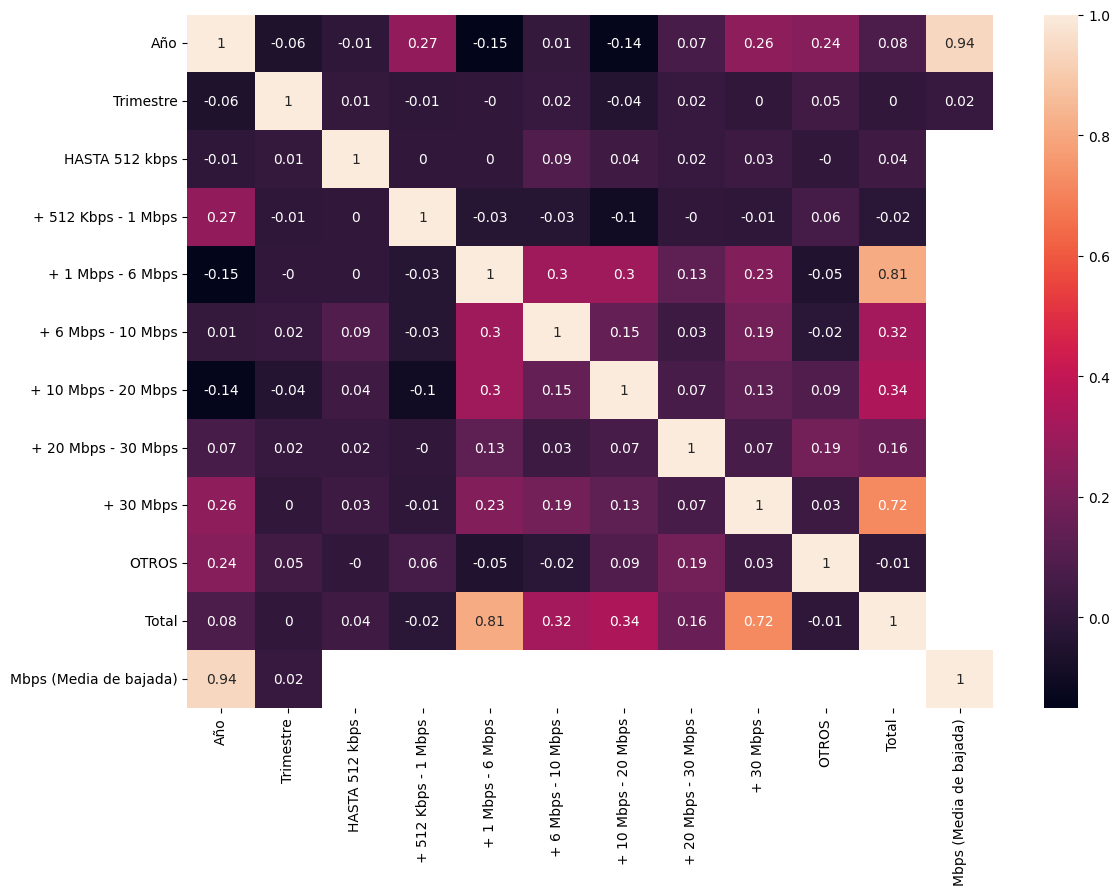

In [317]:
#### MAPA DE CALOR CON LAS CORRELACIONES
df_numerico = acceso_por_velocidad.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()

# CONCLUSIONES: Vemos que hay una correlacion alta entre 'año' y 'Mbps(media de bajada)

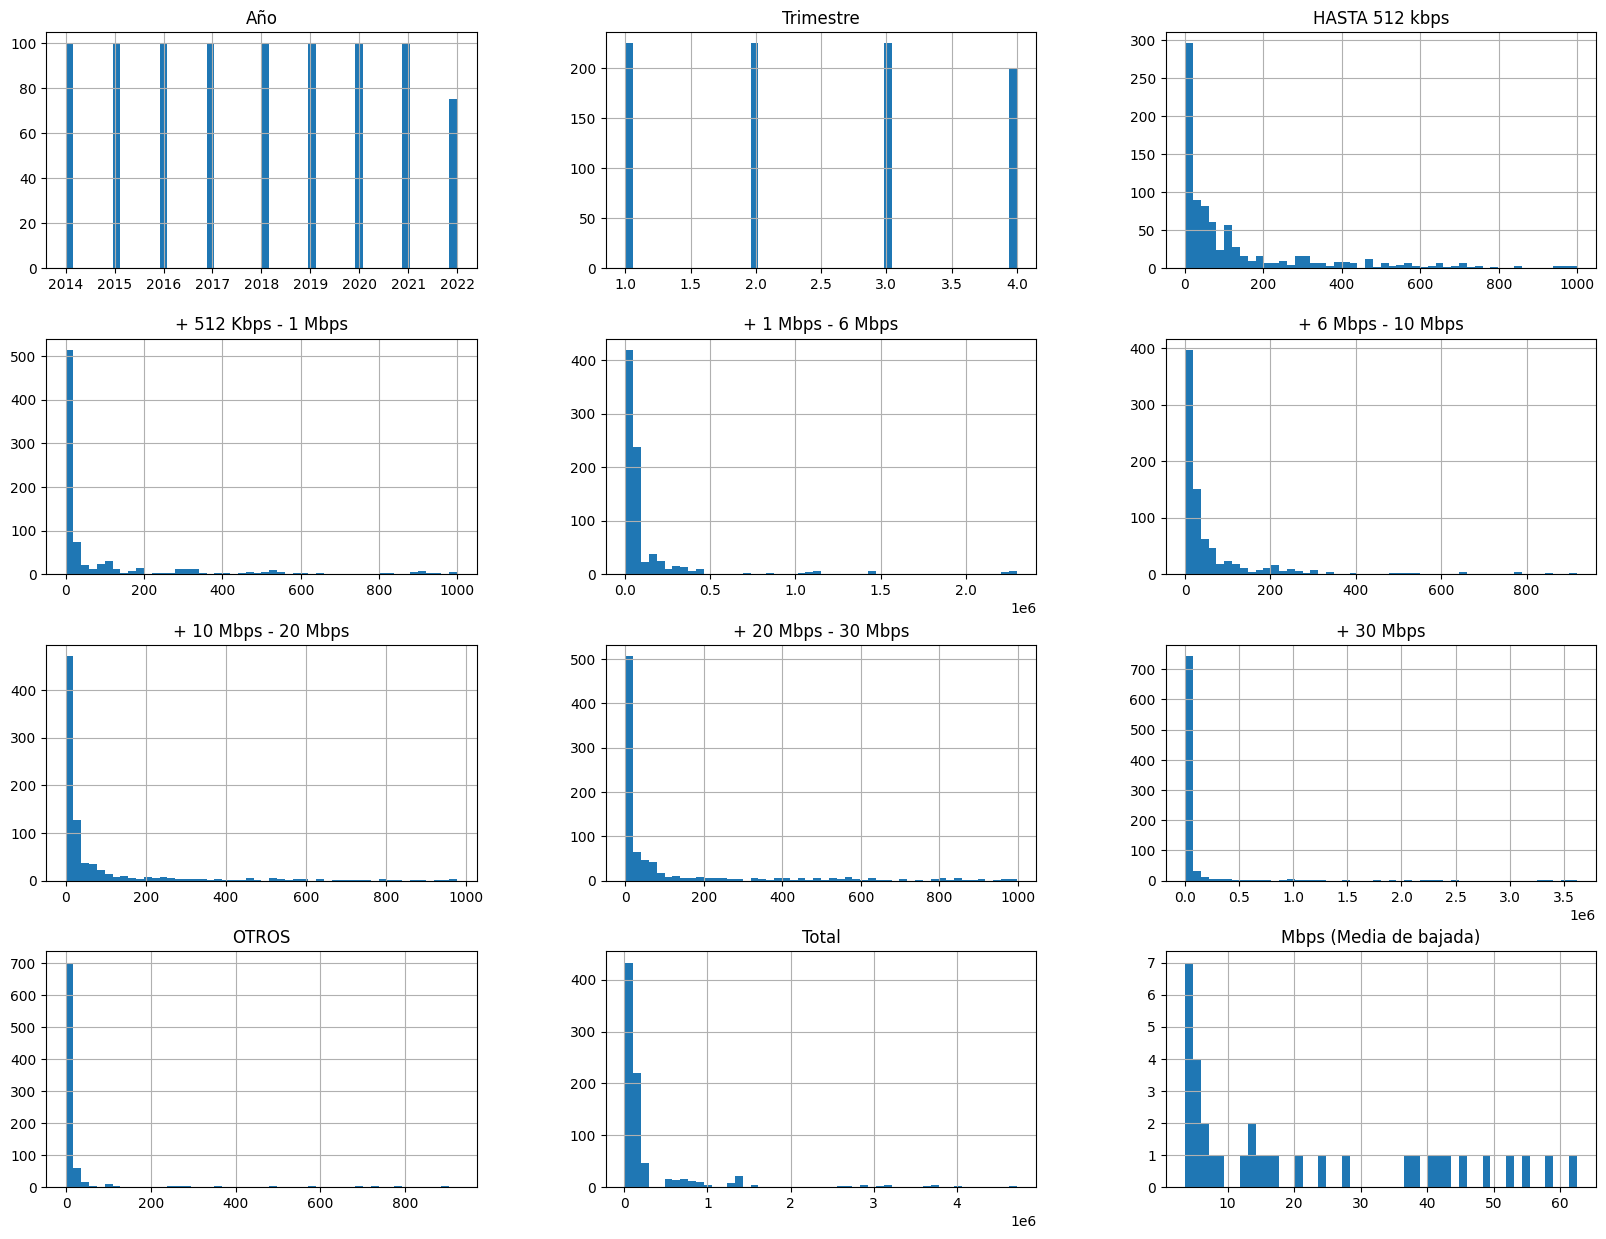

In [318]:
#### CREAMOS HISTOGRAMAS PARA CONOCER LA DISTRIBUCION DE LOS DATOS
df_numerico.hist(bins = 50, figsize= (20,15))
plt.show()

## ETL - EDA - Accesos_tecnologia

In [319]:
print(accesos_tecnologia.shape)
accesos_tecnologia.head(5)

(35, 9)


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [320]:
#### VEMOS LOS TIPOS DE DATOS 
accesos_tecnologia.info()

#CONCLUSIONES: Debemos transformar el tipo de dato las columnas 'ADSL', 'Cablemodem', 'Fibra optica', y 'Total' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [321]:
#### VANTIDAD DE NULOS
accesos_tecnologia.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [322]:
#### TRANSFORMAMOS TIPOS DE DATOS
accesos_tecnologia['ADSL'] = accesos_tecnologia['ADSL'].str.replace('.', '').str.replace(',', '.').astype(float)
accesos_tecnologia['Cablemodem'] = accesos_tecnologia['Cablemodem'].str.replace('.', '').str.replace(',', '.').astype(float)
accesos_tecnologia['Fibra óptica'] = accesos_tecnologia['Fibra óptica'].str.replace('.', '').str.replace(',', '.').astype(float)
accesos_tecnologia['Total'] = accesos_tecnologia['Total'].str.replace('.', '').str.replace(',', '.').astype(float)

In [323]:
#### DESCRIPCION ESTADISTICA NUMERICA
accesos_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,248.280029,147.431086,8.297800e+06
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,174.354293,85.868717,1.399611e+06
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,70.749000,54.300000,6.398398e+06
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,85.107500,62.763500,7.057455e+06
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,194.267000,100.554000,8.110444e+06
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,394.963000,247.918500,9.260442e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.871541e+06,557.110000,265.328000,1.109113e+07


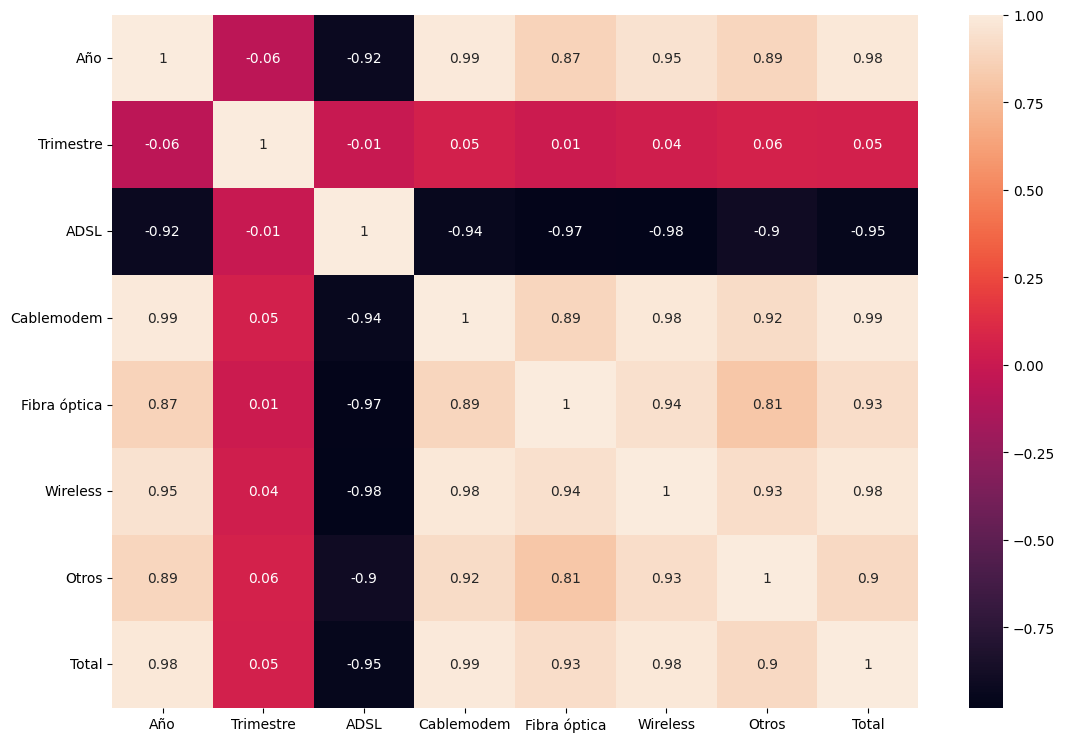

In [324]:
#### MAPA DE CALOR CON LAS CORRELACIONES
df_numerico = accesos_tecnologia.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()

# CONCLUSIONES: Vemos que todas las tecnologias que proveen acceso a internet tienen alta correlacion con la columna 'año'

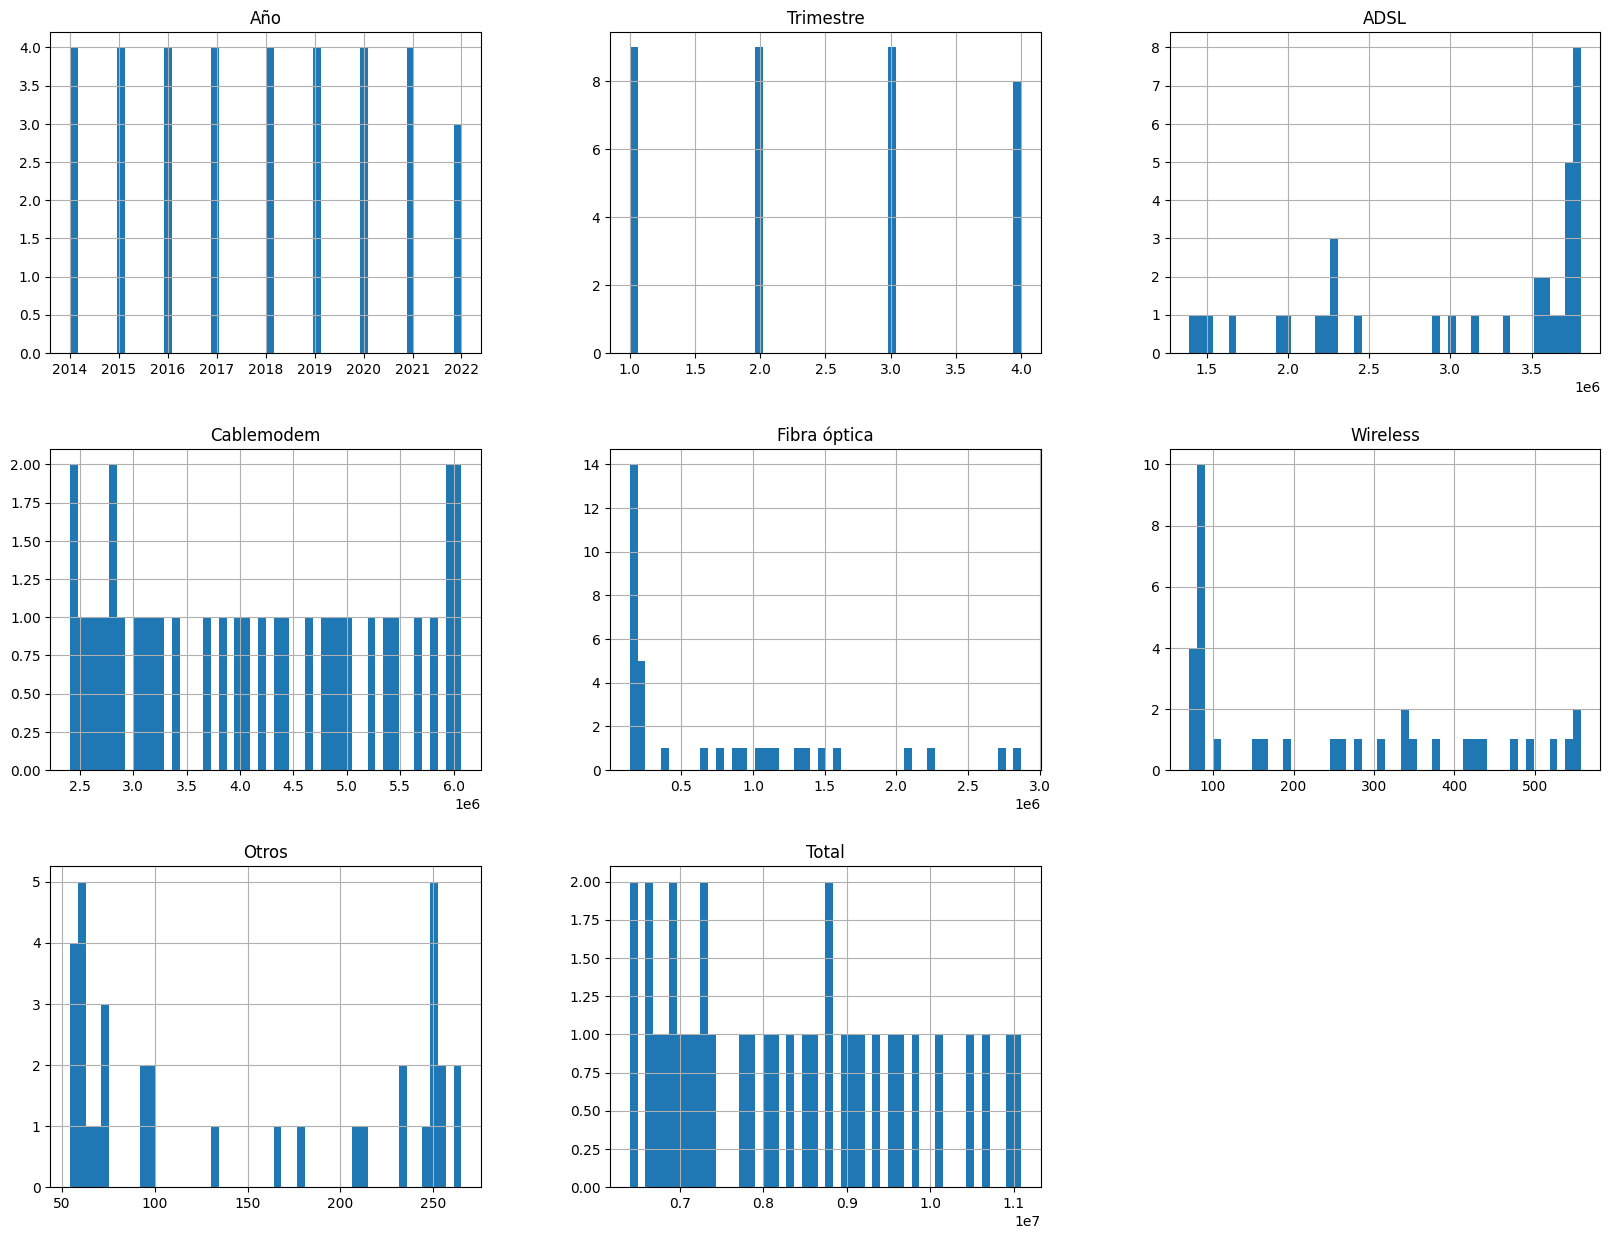

In [325]:
#### CREAMOS HISTOGRAMAS PARA CONOCER LA DISTRIBUCION DE LOS DATOS
df_numerico.hist(bins = 50, figsize= (20,15))
plt.show()

## ETL - EDA - Conectividad

In [326]:
print(conectividad.shape)
conectividad.head(5)

(4312, 16)


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [327]:
#### TIPOS DE DATOS
conectividad.info()

#CONCLUSIONES: Transformar el tipo de dato de 'latitud' y 'longitud'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [328]:
#### CANTIDAD DE NULOS
conectividad.isnull().sum()

Provincia         0
Partido           0
Localidad         0
Poblacion         0
ADSL              0
CABLEMODEM        0
DIALUP            0
FIBRAOPTICA       0
SATELITAL         0
WIRELESS          0
TELEFONIAFIJA     0
3G                0
4G                0
link             12
Latitud           0
Longitud          0
dtype: int64

In [329]:
#### TRANSFORMAMOS A TIPO DE DATO CORRECTO
conectividad['Latitud'] = conectividad['Latitud'].str.replace('.', '').str.replace(',', '.').astype(float)
conectividad['Longitud'] = conectividad['Longitud'].str.replace('.', '').str.replace(',', '.').astype(float)

In [330]:
#### DESCRIPCION ESTADISTICA NUMERICA
conectividad.describe()

,Poblacion,link,Latitud,Longitud
count,4.312000e+03,4.300000e+03,4312.000000,4312.000000
mean,8.693093e+03,3.909872e+07,-32.263374,-63.040166
std,3.821544e+04,2.939305e+07,4.999915,3.830429
min,0.000000e+00,2.000010e+06,-77.874009,-72.891627
25%,1.160000e+02,1.009104e+07,-34.709115,-65.687881
50%,5.755000e+02,3.401053e+07,-32.284857,-63.454127
75%,3.202000e+03,6.612602e+07,-28.585292,-60.009247
max,1.317298e+06,9.401402e+07,-21.817293,-34.626560


In [331]:
#### DESCIPCION ESTADISTICA DE LOS DATOS TIPO TEXTO 
tipo_texto = conectividad.select_dtypes(include=['object']).columns
df_texto = conectividad[tipo_texto]
df_texto.describe()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,--,SI,SI,--,SI
freq,901,85,12,3179,3436,3909,2866,3233,2242,2162,2432,2574


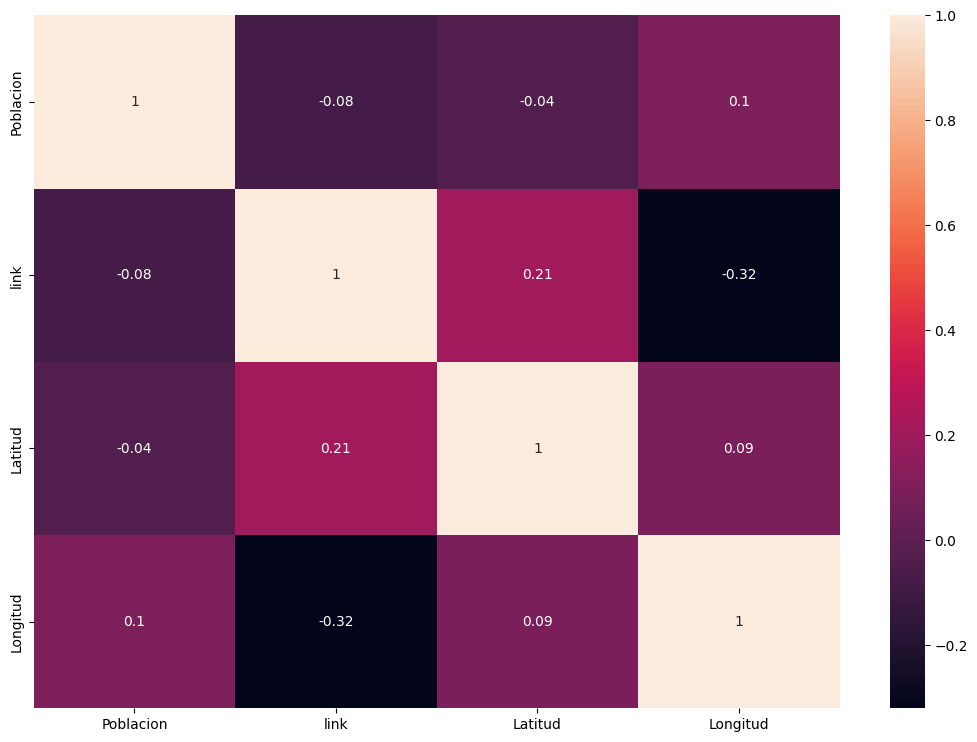

In [332]:
#### MAPA DE CALOR CON LAS CORRELACIONES
df_numerico = conectividad.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()


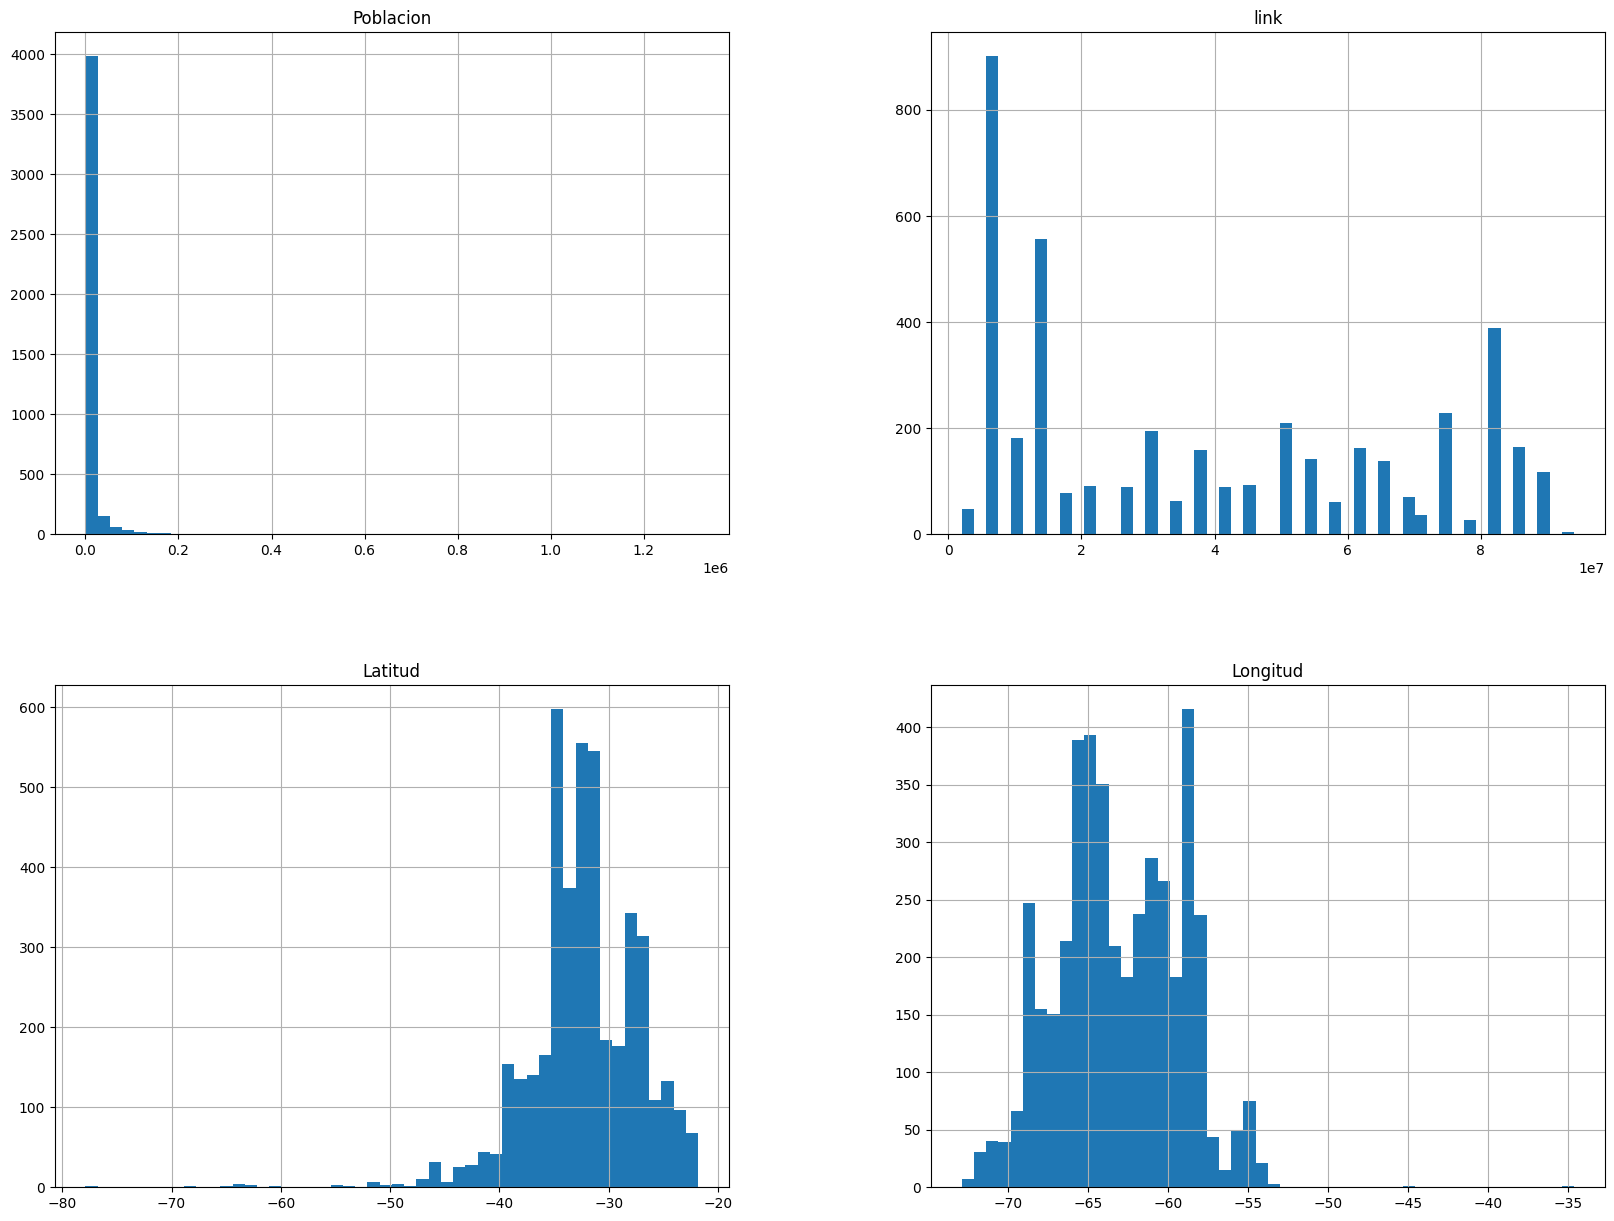

In [333]:
#### CREAMOS HISTOGRAMAS PARA CONOCER LA DISTRIBUCION DE LOS DATOS
df_numerico.hist(bins = 50, figsize= (20,15))
plt.show()

## ETL - EDA - Localidad

In [334]:
print(localidades.shape)
localidades.head(5)

(4312, 12)


,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [335]:
#### TIPOS DE DATOS EN LAS COLUMNAS
localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


In [336]:
#### CANTIDAD DE NULOS
localidades.isnull().sum()

Provincia        0
Partido          0
Localidad        0
ADSL             0
CABLEMODEM       0
DIALUP           0
FIBRAOPTICA      0
4G               0
3G               0
TELEFONIAFIJA    0
WIRELESS         0
SATELITAL        0
dtype: int64

In [337]:
#### DESCRIPCION ESTADISTICA NUMERICA
localidades.describe()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,85,12,3179,3436,3909,2866,2574,2432,2162,2242,3233


## EXPORTAMOS COMO CSVs LOS DATASETS 

In [338]:
BAF.to_csv("baf_data.csv")
penetracion.to_csv("penetracion_data.csv")
ingresos.to_csv("ingresos_data.csv")
acceso_por_velocidad.to_csv("accesos_velocidad_data.csv")
accesos_tecnologia.to_csv("accesos_tecnologia_data.csv")
conectividad.to_csv("conectividad_data.csv")
localidades.to_csv("localidades_data.csv")

In [339]:
penetracion.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,Buenos Aires,78.11,NaN,NaN
1,2022,3,Capital Federal,122.28,NaN,NaN
2,2022,3,Catamarca,65.33,NaN,NaN
3,2022,3,Chaco,43.86,NaN,NaN
4,2022,3,Chubut,84.38,NaN,NaN


In [346]:
agrupado = penetracion.groupby('Año')['Accesos por cada 100 hogares'].sum()
agrupado

Año
2014    3742.22
2015    3971.25
2016    4042.28
2017    4306.21
2018    4893.93
2019    5407.72
2020    5649.54
2021    6230.88
2022    5080.84
Name: Accesos por cada 100 hogares, dtype: float64

In [347]:
agrupado= pd.DataFrame(agrupado)

In [348]:
agrupado["Tasa accesos"] = (agrupado["Accesos por cada 100 hogares"] - agrupado["Accesos por cada 100 hogares"].shift(1)) / agrupado["Accesos por cada 100 hogares"].shift(1) * 100

In [349]:
agrupado

,Accesos por cada 100 hogares,Tasa accesos
Año,,
2014,3742.22,NaN
2015,3971.25,6.120164
2016,4042.28,1.788606
2017,4306.21,6.529236
2018,4893.93,13.648196
2019,5407.72,10.498516
2020,5649.54,4.471755
2021,6230.88,10.290041
2022,5080.84,-18.457104


In [350]:
agrupado["tendencia_usuarios"] = agrupado["Tasa accesos"].apply(lambda x: "Aumento" if x > 0 else "Bajo")

In [351]:
agrupado

,Accesos por cada 100 hogares,Tasa accesos,tendencia_usuarios
Año,,,
2014,3742.22,NaN,Bajo
2015,3971.25,6.120164,Aumento
2016,4042.28,1.788606,Aumento
2017,4306.21,6.529236,Aumento
2018,4893.93,13.648196,Aumento
2019,5407.72,10.498516,Aumento
2020,5649.54,4.471755,Aumento
2021,6230.88,10.290041,Aumento
2022,5080.84,-18.457104,Bajo


In [354]:
agrupado.to_csv("agrupado_de_accesos.csv")